In [2]:
from pathlib import Path

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = Path('../data')
results = Path('../results-aug-32-128')

In [15]:
label = pd.read_csv(str(data.joinpath('test-label.csv'))).values[:, -1]
pred = pd.read_csv(str(results.joinpath('prediction.csv'))).values[:, -1]

In [16]:
x_range = np.arange(np.size(label, 0))

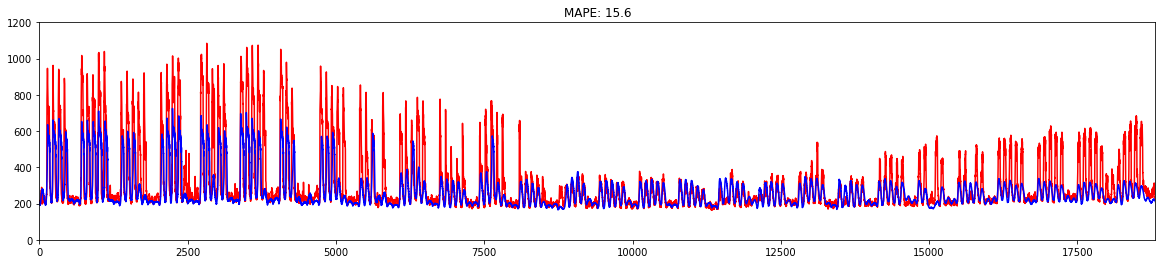

In [17]:
plt.figure(figsize=(20, 4))
plt.title(f'MAPE: {mean_absolute_percentage_error(label, pred):.4}')
plt.ylim(0, 1200)
plt.xlim(0, 18816)
plt.plot(x_range, label, c='r')
plt.plot(x_range, pred, c='b')
plt.savefig('test.jpg', dpi=400)

In [4]:
def mean_absolute_percentage_error(y_true, y_pred, epsilon=1):
    diff = np.abs((y_true - y_pred) / np.clip(np.abs(y_true), epsilon, None))
    return 100. * np.mean(diff)

In [5]:
def scale(values):
    min_ = values.min()
    max_ = values.max()
    
    return (values - min_) / (max_ - min_)

In [6]:
def show(filename, prefix='aug'):
    try:
        data = Path('../data')
        results = Path(f'../{prefix}/{filename}')
        label = pd.read_csv(str(data.joinpath('test-label.csv'))).values[:, -1]
        pred = pd.read_csv(str(results.joinpath('prediction.csv'))).values[1:, -1]
        label = scale(label)
        pred = scale(pred)
        x_range = np.arange(np.size(label, 0))
        plt.figure(figsize=(20, 4))
        plt.title(f'MAPE: {mean_absolute_percentage_error(label, pred):.4}')
        plt.ylim(0, 1)
        plt.xlim(0, 18816)
        plt.plot(x_range, label, c='r')
        plt.plot(x_range, pred, c='b')
        plt.show()
    except:
        try:
            data = Path('../data')
            results = Path(f'../{prefix}/{filename}')
            label = pd.read_csv(str(data.joinpath('test-label.csv'))).values[:, -1]
            pred = pd.read_csv(str(results.joinpath('prediction.csv'))).values[:, -1]
            label = scale(label)
            pred = scale(pred)
            x_range = np.arange(np.size(label, 0))
            plt.figure(figsize=(20, 4))
            plt.title(f'MAPE: {mean_absolute_percentage_error(label, pred):.4}')
            plt.ylim(0, 1)
            plt.xlim(0, 18816)
            plt.plot(x_range, label, c='r')
            plt.plot(x_range, pred, c='b')
            plt.show()
        except:
            pass
#     plt.savefig('test.jpg', dpi=400)

32 32


<Figure size 1440x288 with 0 Axes>

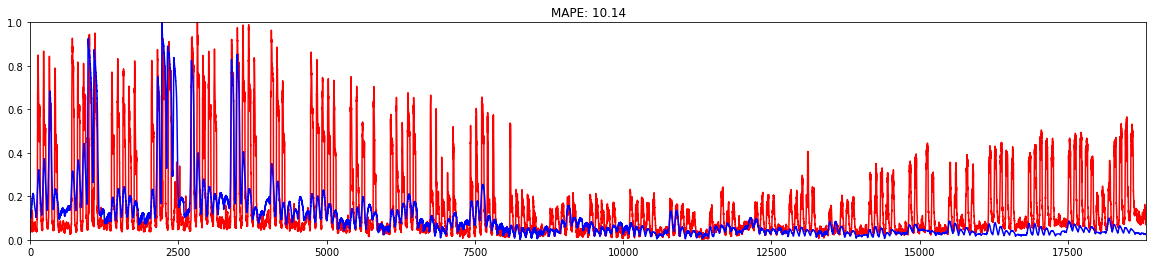

32 64


<Figure size 1440x288 with 0 Axes>

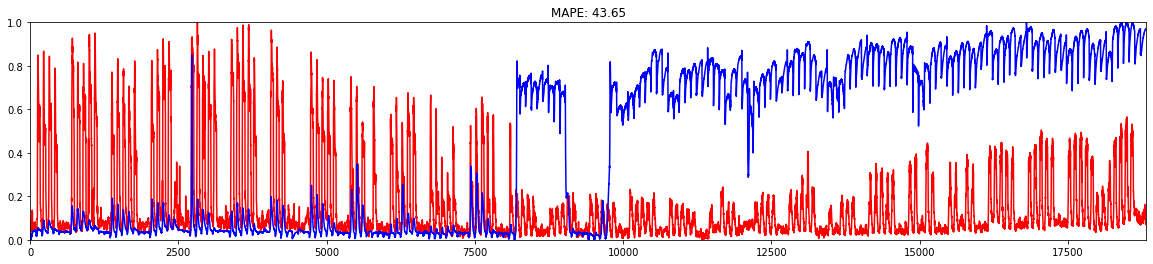

32 128


<Figure size 1440x288 with 0 Axes>

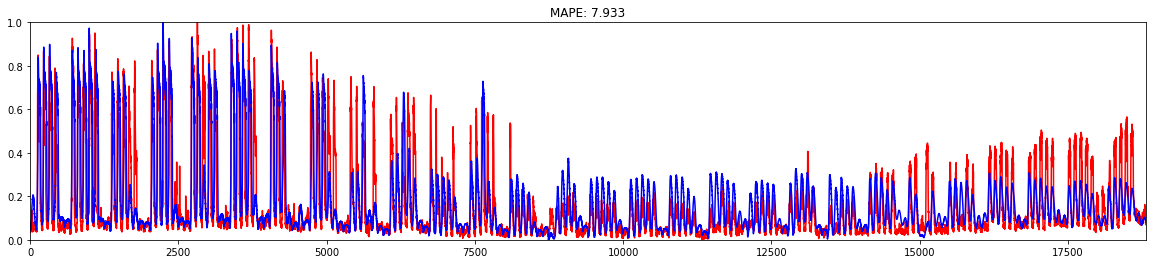

32 256


<Figure size 1440x288 with 0 Axes>

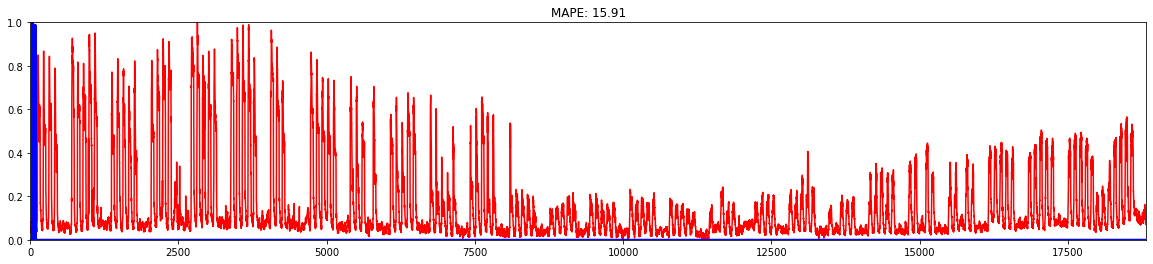

32 512


/home/jiun/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


<Figure size 1440x288 with 0 Axes>

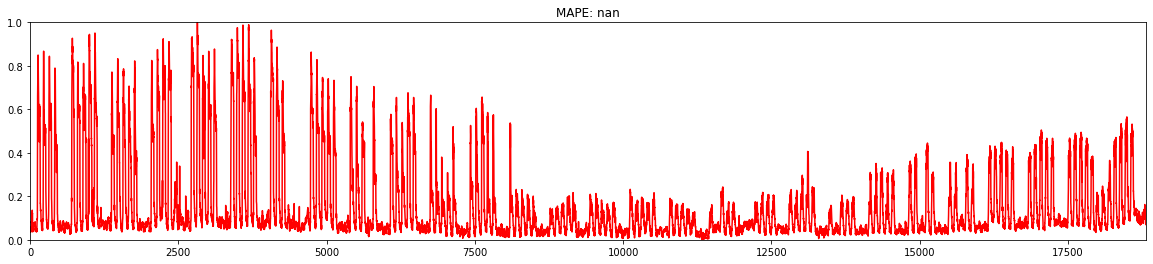

32 1024
32 2048
32 4096
32 8192
64 32


<Figure size 1440x288 with 0 Axes>

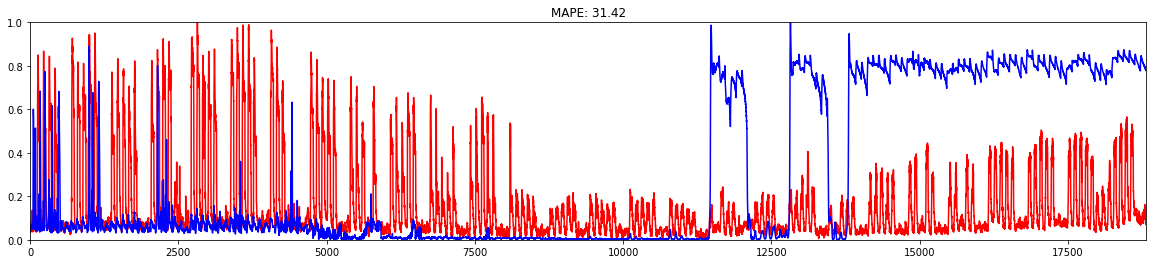

64 64


<Figure size 1440x288 with 0 Axes>

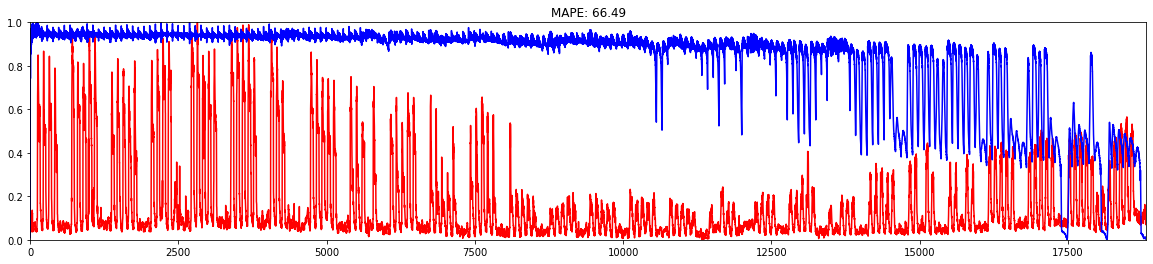

64 128


<Figure size 1440x288 with 0 Axes>

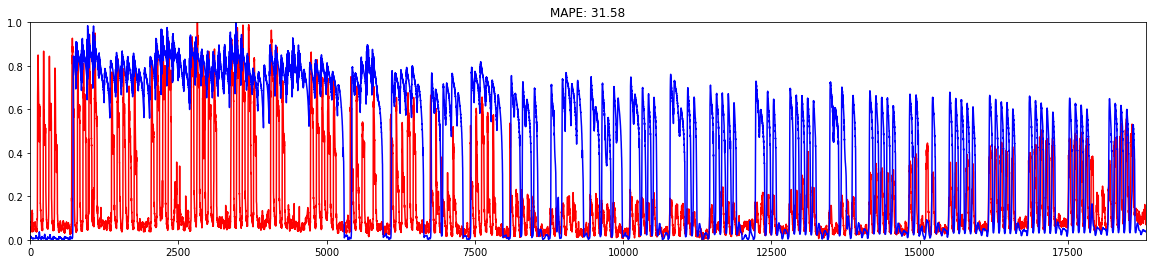

64 256


<Figure size 1440x288 with 0 Axes>

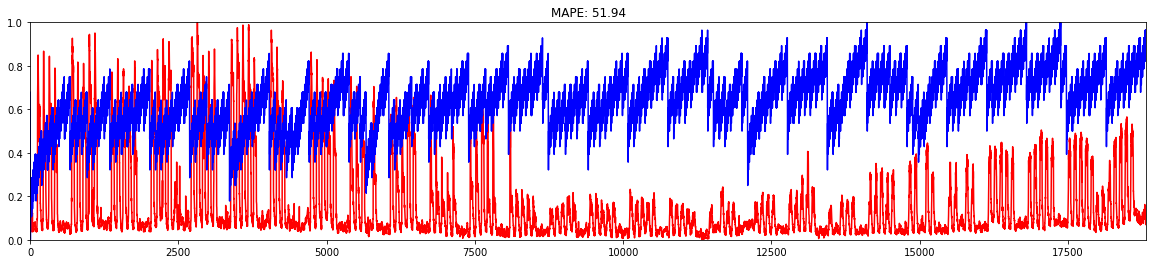

64 512


<Figure size 1440x288 with 0 Axes>

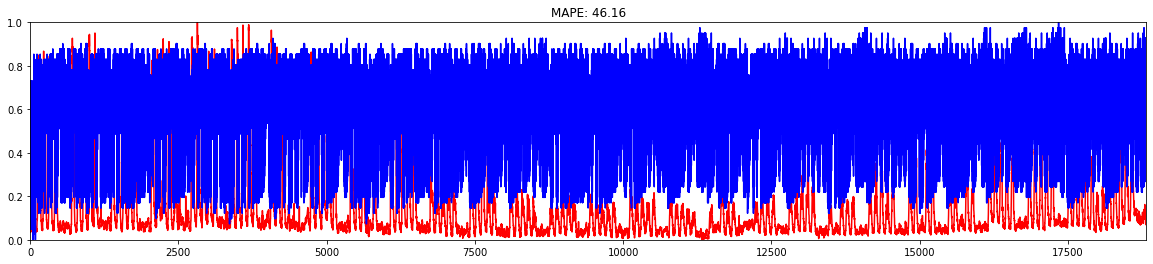

64 1024
64 2048
64 4096
64 8192
128 32


<Figure size 1440x288 with 0 Axes>

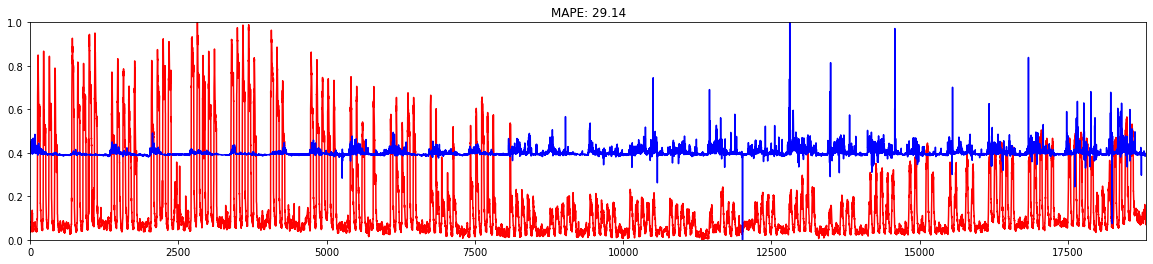

128 64


<Figure size 1440x288 with 0 Axes>

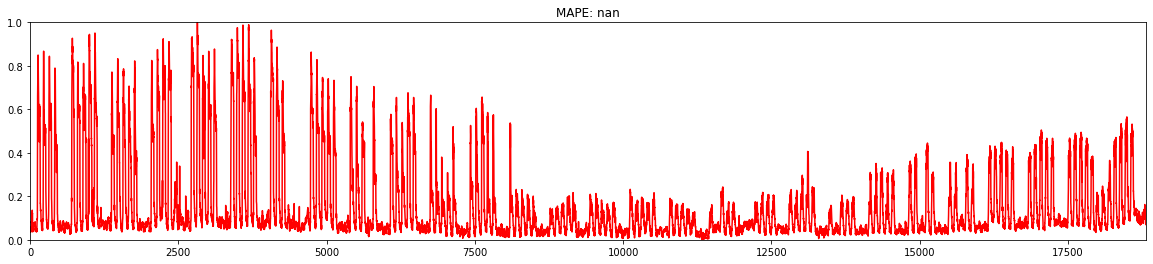

128 128
128 256
128 512
128 1024
128 2048
128 4096
128 8192
256 32


<Figure size 1440x288 with 0 Axes>

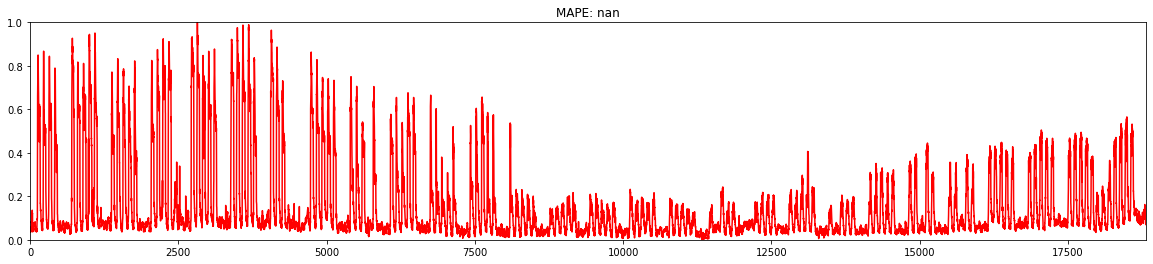

256 64
256 128
256 256
256 512
256 1024
256 2048
256 4096
256 8192
512 32
512 64
512 128
512 256
512 512
512 1024
512 2048
512 4096
512 8192
1024 32
1024 64
1024 128
1024 256
1024 512
1024 1024
1024 2048
1024 4096
1024 8192
2048 32
2048 64
2048 128
2048 256
2048 512
2048 1024
2048 2048
2048 4096
2048 8192
4096 32
4096 64
4096 128
4096 256
4096 512
4096 1024
4096 2048
4096 4096
4096 8192
8192 32
8192 64
8192 128
8192 256
8192 512
8192 1024
8192 2048
8192 4096
8192 8192


In [42]:
for i, input_size in enumerate([32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]):
    for j, hidden_size in enumerate([32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]):
        print(input_size, hidden_size)
        show(f'results-aug-{input_size}-{hidden_size}', prefix='aug')

In [10]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred, epsilon=1):
    diff = np.abs((y_true - y_pred) / np.clip(np.abs(y_true), epsilon, None))
    return 100. * np.mean(diff)

## Visualize by Day

In [32]:
mape_days = np.hstack((days_unique, np.empty((196, 1))))

In [33]:
data = Path('../data')
results = Path('../results')
dest = Path(f'../figures')
dest.mkdir(exist_ok=True)

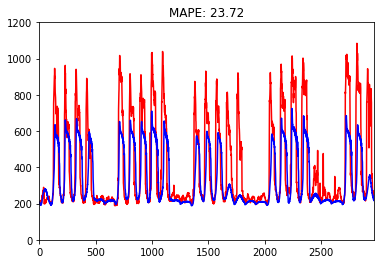

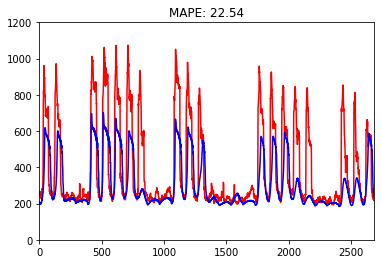

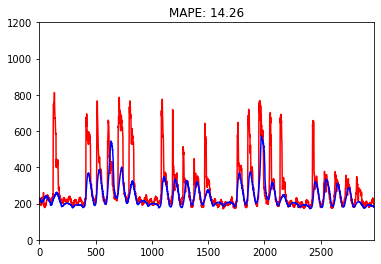

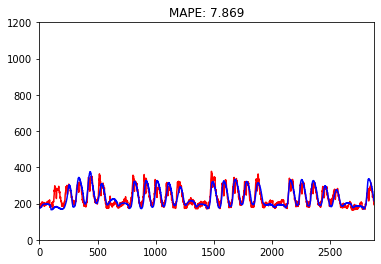

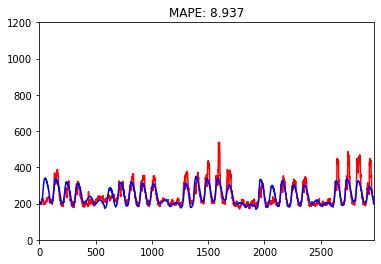

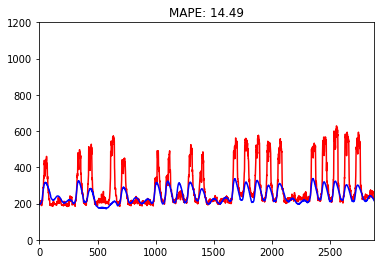

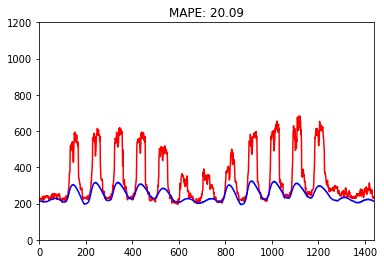

In [34]:
label = pd.read_csv(str(data.joinpath('test-label.csv'))).values[:, -1]
pred_data = pd.read_csv(str(results.joinpath(f'prediction.csv'))).values
pred = pred_data[:, -1]
d = dest.joinpath('days')
d.mkdir(exist_ok=True)
days = pred_data[:, :2]
days_unique = np.sort(np.unique(days, axis=0))
for i, day in enumerate(days_unique):
    index = np.where((days == day).all(axis=1))
    mo, da = day
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    error = mean_absolute_percentage_error(label[index], pred[index])
    ax.set_title(f'MAPE: {error:.4}')
    mape_days[i, -1] = error
    ax.set_ylim((0, 1200))
    ax.set_xlim((0, 96))
    ax.plot(label[index], c='r')
    ax.plot(pred[index], c='b')
    fig.savefig(str(d.joinpath(f'{int(mo):02}-{int(da):02}.jpg')), dpi=400)
    plt.close()
d = dest.joinpath('months')
d.mkdir(exist_ok=True)
months = pred_data[:, :1]
months_unique = np.unique(months, axis=0)
for month in months_unique:
    index = np.where((months == month).all(axis=1))
    mo = month

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(f'MAPE: {mean_absolute_percentage_error(label[index], pred[index]):.4}')
    ax.set_ylim((0, 1200))
    ax.set_xlim((0, index[0].size))
    ax.plot(label[index], c='r')
    ax.plot(pred[index], c='b')
    plt.show()
    fig.savefig(str(d.joinpath(f'{int(mo):02}.jpg')), dpi=400)
    plt.close()

In [35]:
pd.DataFrame(mape_days, columns=['Month', 'Day', 'MAPE']).to_csv(str(dest.joinpath('mape-per-days.csv')), index=None)

## By day

In [ ]:
d = dest.joinpath('days')
d.mkdir(exist_ok=True)

In [ ]:
days = pred_data[:, :2]
days_unique = np.unique(days, axis=0)

In [ ]:
for day in days_unique:
    index = np.where((days == day).all(axis=1))
    mo, da = day

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim((0, 1200))
    ax.set_xlim((0, 96))
    ax.plot(label[index], c='r')
    ax.plot(pred[index], c='b')
    fig.savefig(str(d.joinpath(f'{int(mo):02}-{int(da):02}.jpg')), dpi=400)
    plt.close()

## By month

In [ ]:
d = dest.joinpath('months')
d.mkdir(exist_ok=True)

In [ ]:
months = pred_data[:, :1]
months_unique = np.unique(months, axis=0)

In [ ]:
for month in months_unique:
    index = np.where((months == month).all(axis=1))
    mo = month

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim((0, 1200))
    ax.set_xlim((0, index[0].size))
    ax.plot(label[index], c='r')
    ax.plot(pred[index], c='b')
    fig.savefig(str(d.joinpath(f'{int(mo):02}.jpg')), dpi=400)
    plt.close()